In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from plant_pathology.data import create_datasets
from plant_pathology.train_model import preprocess_img

In [3]:
df = pd.read_csv('../data/train.csv')
classes_used = [label for label in df['labels'].unique() if ' ' not in label]
train_ds, val_ds, label_encoder = create_datasets('../data/train_images', '../data/train.csv', random_state=42, used_classes=classes_used)

In [6]:
val_ds = val_ds.map(lambda img_path, label: preprocess_img(img_path, label, img_shape=(300, 300, 3)))

In [4]:
model = tf.keras.models.load_model('../logs-6-classes/8-bigger')

In [28]:
results = []
imgs = []
for imgs, labels in val_ds.batch(32):
    preds_logits = model(imgs)
    preds = tf.argmax(preds_logits, -1)
    is_correct = preds == labels
    incorrect_imgs = imgs[~(is_correct)]
    break

In [41]:
img = imgs[~(preds == labels)][1].numpy()

In [44]:
labels[~(preds == labels)]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>

In [46]:
preds[~(preds == labels)]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 5])>

In [45]:
label_encoder.classes_

array(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew',
       'rust', 'scab'], dtype=object)

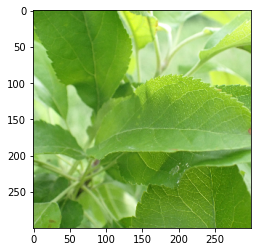

In [42]:
plt.imshow(img)

In [10]:
pred = model(img[None])

2022-04-18 12:45:12.780245: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204


In [24]:
tf.argmax(pred, -1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>

In [25]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [27]:
label_encoder.classes_

array(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew',
       'rust', 'scab'], dtype=object)

In [ ]:
def visualize_mistakes(model, ds, encoder, max_per_class=10):
    pass